# Set environment

import libraries

In [1]:
library(HDclust)
library(tsne)

set directories

In [2]:
OUTDIR  = "/data/clintko/flow_EQAPOL"
DATADIR = "/data/flow/EQAPOL_normal"

set plot size

In [4]:
options(repr.plot.width = 5, repr.plot.height = 5)

# Import data

In [24]:
data(iris)
data("sim2")

In [35]:
head(sim2)

,V1,V2,V3,V4,V5,clsid
5218,0.1200328,-0.3775816,0.11331144,-0.7672648,0.4149177,5
6935,-0.5054753,1.1170781,-0.03167468,-1.9198328,-1.0322345,3
2163,1.1354850,1.1328485,-0.04010509,0.9817798,0.2010662,7
6298,0.2387164,-0.6368129,-2.16828486,-2.0840731,-1.3023509,9
1470,1.4137843,1.2486562,-0.26130597,0.7994986,0.0725803,3
9586,-1.8510139,0.5662053,-0.18340659,-0.2948378,-1.3057096,4


# Check code of the quick tour

**Clustering with HMM-VB**

```
# If variable block structure is unknown
data("sim2")
set.seed(12345)

# find variable block structure
hmmvb <- hmmvbTrain(sim2[,1:5], searchControl=vbSearchControl(nperm=5), nthread=4)

# refine number of states in variable block structure by model selection
modelBIC <- hmmvbBIC(sim2[,1:5], VbStructure=getVb(hmmvb), numst=1:15, nthread=4)
clust <- hmmvbClust(data=sim2[,1:5], bicObj=modelBIC)
```

**Cluster alignment**

```
data("sim3")

# split data set in two halves
X1 = sim3[1:500,]
X2 = sim3[501:1000,]

set.seed(12345)
Vb <- vb(2, 40, c(10,30), c(3,5), list(c(1:10),c(11:40)))

# train HMM-VB on dataset X1 and cluster data
hmmvb <- hmmvbTrain(X1[1:40], VbStructure=Vb)
clust1 <- hmmvbClust(X1[1:40], model=hmmvb)
show(clust1)

# cluster data set X2 using HMM-VB and cluster parameters for dataset X1
clust2 <- hmmvbClust(X2[1:40], model=hmmvb, rfsClust=getClustParam(clust1))
#> All found viterbi sequences match with sequences in reference clusters

show(clust2)
```

# Try simulated data

If a variable block structure is unknown, one can search for it with hmmvbTrain() function. **The search is performed by a greedy algorithm**. Thus multiple permutations of variables are needed for the best estimation of the variable block structure. With many permutations, the search becomes a time-consuming process, and to accelerate it, we advice to use as many cores as your machine has. This is done with parameter nthread, which we set to 4 in the example below, since our machine has 4 cores.

In [25]:
# If variable block structure is unknown
set.seed(12345)

# find variable block structure
hmmvb <- hmmvbTrain(sim2[1:5], searchControl = vbSearchControl(nperm = 5), nthread = 4)
show(hmmvb)

--------------------------------------
Hidden Markov Model on Variable Blocks
--------------------------------------

------------------------
Variable block structure
------------------------

Data dimensionality = 5 

Number of variable blocks = 1 

Dimensionality of variable blocks: 5 

Number of states in variable blocks: 12 

Variable order in variable blocks:
Block 1 : 1 2 3 4 5 
------------------------

BIC = 25300.05 

Covariance matrices are diagonal = FALSE 

To show parameters of HMMs, access elements in HmmChain list.


<font color="red">In the above statement, it mentions **Number of states in variable blocks: 12**</font>

Suggested variable block structure has a single variable block. That is in hand with the data, which was generated from **a mixture of 10 Gaussian components**. After finding the variable block structure, we recommend to run model selection to refine the number of mixture components:

In [44]:
# refine number of states in variable block structure by model selection
modelBIC <- hmmvbBIC(sim2[,1:5], VbStructure=getVb(hmmvb), numst = 1:15, nthread = 4)

  |=================================================================     |  93%

<font color="red">From BCI, it shows that there may be **11 states**</font>

In [45]:
show(modelBIC)

------------------------------------------------------
Optimal number of states: 11 with BIC: 25140.89 
------------------------------------------------------



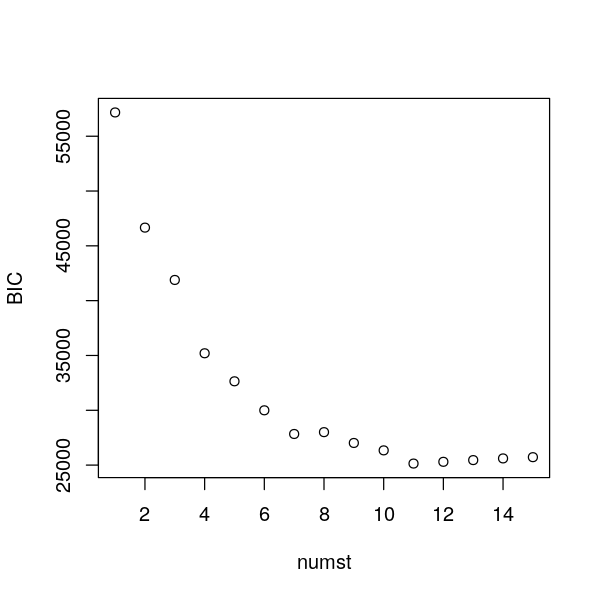

In [27]:
plot(getNumst(modelBIC), getBIC(modelBIC), xlab = 'numst', ylab = 'BIC')

<font color = red>Using hmmvbClust, it is suggested that there are **10 number of clusters**</font>

In [29]:
clust <- hmmvbClust(data = sim2[, 1:5], bicObj = modelBIC)
show(clust)

------------------------------------------------------
Clustering with Hidden Markov Model on Variable Blocks
------------------------------------------------------

Number of clusters = 10 

Cluster sizes: 108 1139 479 485 496 499 765 518 43 468 



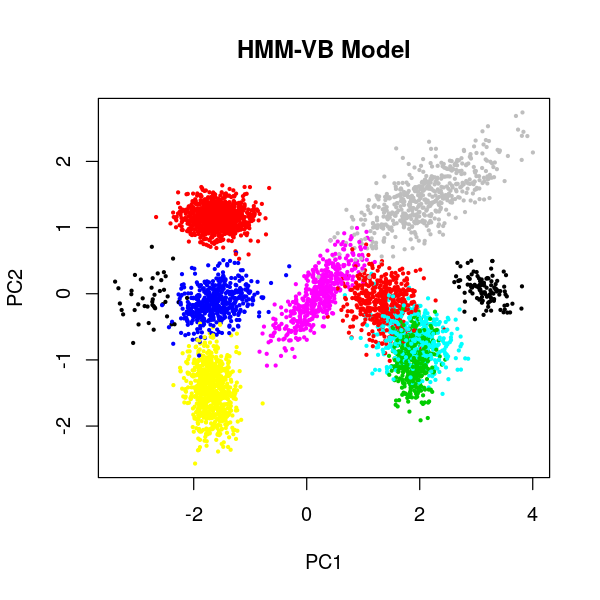

In [40]:
pc <- princomp(sim2[, 1:5])

plot(pc$scores[, 1], pc$scores[, 2], 
     pch = 20, cex = 0.5, 
     col = clust@clsid, 
     xlab = "PC1", ylab = "PC2",
     main = "HMM-VB Model")

<font color = red>Using the real clusters in simulated data, the results look strange</font>

In [47]:
head(sim2, 3)

,V1,V2,V3,V4,V5,clsid
5218,0.1200328,-0.3775816,0.11331144,-0.7672648,0.4149177,5
6935,-0.5054753,1.1170781,-0.03167468,-1.9198328,-1.0322345,3
2163,1.1354850,1.1328485,-0.04010509,0.9817798,0.2010662,7


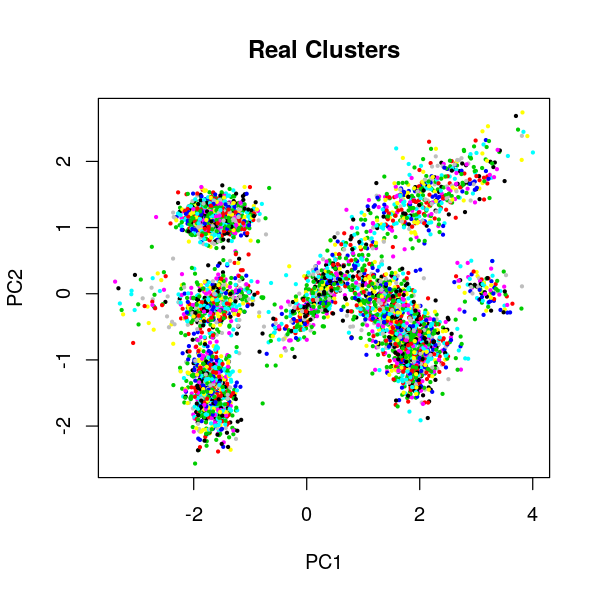

In [39]:
pc <- princomp(sim2[, 1:5])

plot(pc$scores[, 1], pc$scores[, 2], 
     pch = 20, cex = 0.5, 
     col = sim2[, "clsid"], 
     xlab = "PC1", ylab = "PC2",
     main = "Real Clusters")

## try another code

In [41]:
dat <- sim2[, 1:5]

set.seed(12345)
hmmvb <- hmmvbTrain(dat, searchControl = vbSearchControl(nperm = 5), nthread = 4)
clust <- hmmvbClust(dat, model = hmmvb)

In [42]:
show(clust)

------------------------------------------------------
Clustering with Hidden Markov Model on Variable Blocks
------------------------------------------------------

Number of clusters = 10 

Cluster sizes: 222 1114 660 796 343 601 391 166 46 661 



<font color = red>I have no idea why these two lines of code generate very different results</font>
```
clust <- hmmvbClust(data = sim2[, 1:5], bicObj = modelBIC)
clust <- hmmvbClust(data = sim2[, 1:5], model = hmmvb)
```

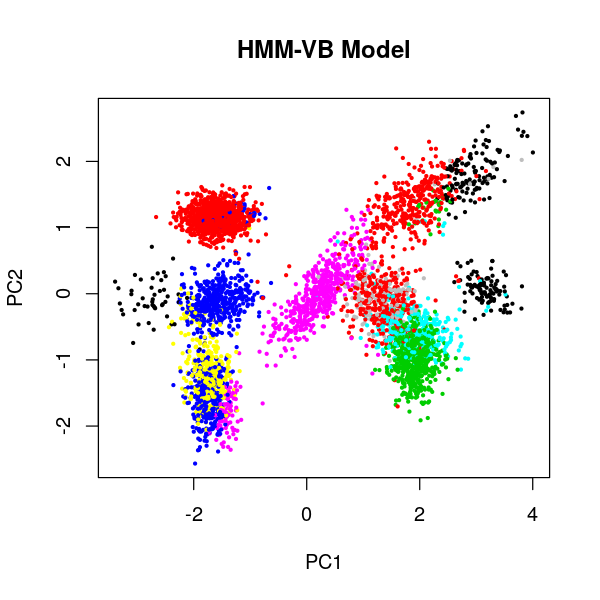

In [43]:
pc <- princomp(sim2[, 1:5])

plot(pc$scores[, 1], pc$scores[, 2], 
     pch = 20, cex = 0.5, 
     col = clust@clsid, 
     xlab = "PC1", ylab = "PC2",
     main = "HMM-VB Model")

I have checked the document of hmmvbClust
```
model  --- An object of class 'HMMVB' that contains trained HMM-VB obtained by the call to function hmmvbTrain
bicObj --- An object of class 'HMMVBBIC' which stores results of model selection. If provided, argument model is ignored.
```

# Try iris data

## Hidden state = 2

In [5]:
dat <- iris[, 1:4]
Vb  <- vb(1, dim = 4, numst = 2)

set.seed(12345)
hmmvb <- hmmvbTrain(dat, VbStructure = Vb)
clust <- hmmvbClust(dat, model = hmmvb)

In [6]:
show(clust)

------------------------------------------------------
Clustering with Hidden Markov Model on Variable Blocks
------------------------------------------------------

Number of clusters = 2 

Cluster sizes: 50 100 



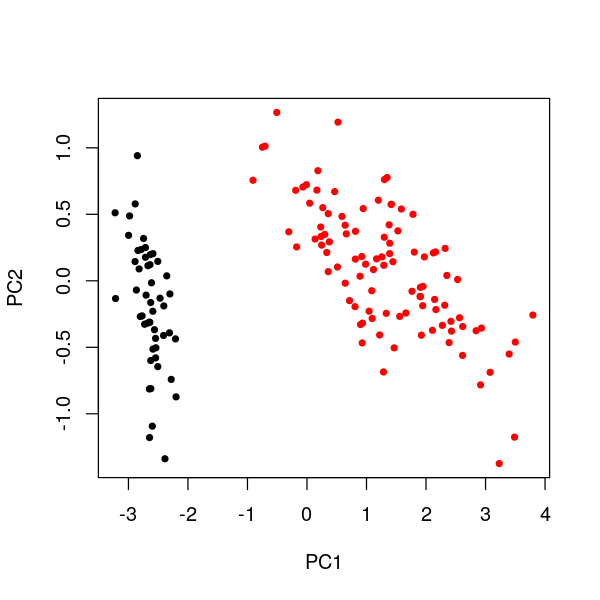

In [8]:
plot(clust, pch = 20)

## plot PCA plot manually

In [9]:
pc = princomp(dat)
names(pc)

[1] "sdev"     "loadings" "center"   "scale"    "n.obs"    "scores"   "call"

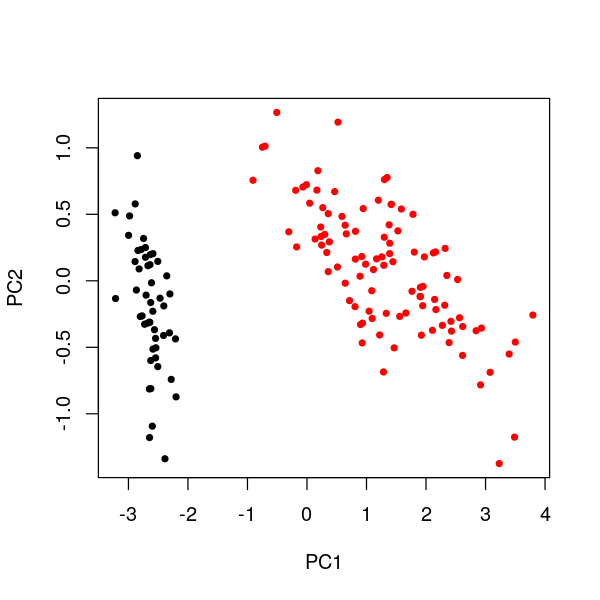

In [11]:
plot(pc$scores[, 1], pc$scores[, 2], pch = 20, col = clust@clsid, xlab = "PC1", ylab = "PC2")

## Try hidden state = 3

In [18]:
### initialization
dat <- iris[, 1:4]
Vb  <- vb(1, dim = 4, numst = 3)

### train the model
set.seed(12345)
hmmvb <- hmmvbTrain(dat, VbStructure = Vb)
clust <- hmmvbClust(dat, model = hmmvb)
pc    <- princomp(dat)

In [19]:
clust@clsid

[1] 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 [38] 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 [75] 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
[112] 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
[149] 2 2

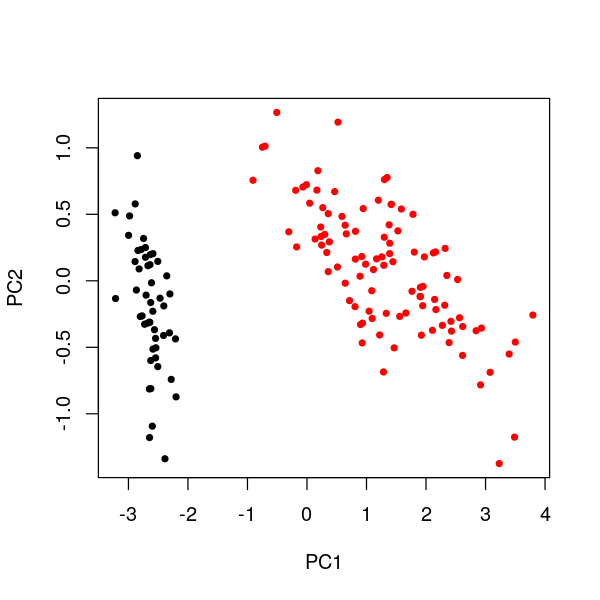

In [15]:
plot(pc$scores[, 1], pc$scores[, 2], 
     col = clust@clsid, 
     pch = 20, 
     xlab = "PC1", 
     ylab = "PC2")

## Not specify hidden state

In [20]:
### initialization
dat <- iris[, 1:4]

### train the model
set.seed(12345)
hmmvb <- hmmvbTrain(dat, searchControl = vbSearchControl(nperm = 5), nthread = 4)
clust <- hmmvbClust(dat, model = hmmvb)
pc    <- princomp(dat)

In [21]:
clust@clsid

[1] 1 1 1 1 1 4 1 1 1 1 1 1 1 1 1 4 4 4 4 4 1 4 1 4 1 1 4 1 1 1 1 4 1 1 1 1 1
 [38] 1 1 1 1 1 1 4 4 1 1 1 1 1 2 3 2 3 2 3 3 3 2 3 3 3 2 3 3 2 3 3 2 3 3 3 2 3
 [75] 3 2 2 2 3 3 3 3 3 3 3 3 2 2 3 3 3 3 3 3 3 3 3 3 3 3 5 3 5 5 5 5 3 5 5 5 5
[112] 2 5 3 5 5 5 5 5 2 5 3 5 2 5 5 3 3 5 5 5 5 5 3 5 5 5 5 3 5 5 5 3 5 5 5 2 5
[149] 5 3

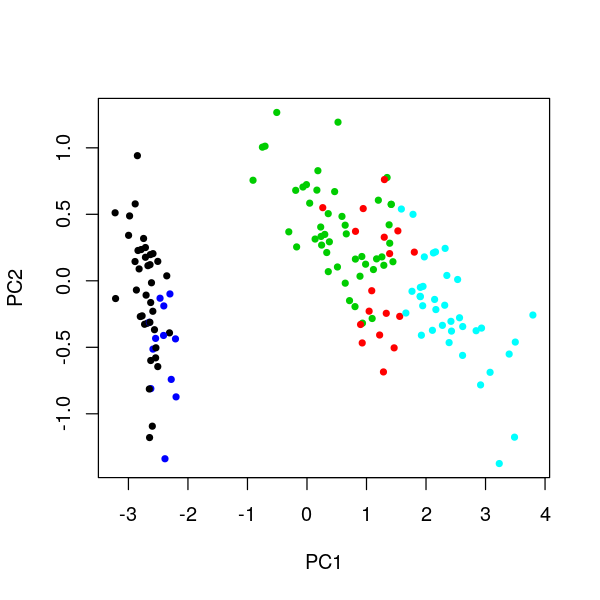

In [22]:
plot(pc$scores[, 1], pc$scores[, 2], 
     col = clust@clsid, 
     pch = 20, 
     xlab = "PC1", 
     ylab = "PC2")